In [1]:
import pprint
import json
import pandas as pd

In [6]:
f = open("disease_shex.json")
shex_results = json.load(f)
df = pd.DataFrame(shex_results)

In [12]:
df["result"].value_counts()

True     9241
False    3813
Name: result, dtype: int64

<AxesSubplot:>

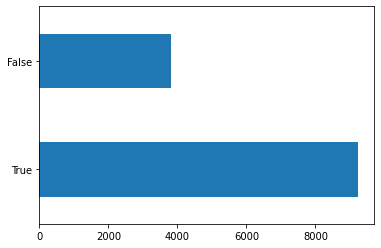

In [7]:
df["result"].value_counts().plot(kind='barh')

In [8]:
r2 = []
for index, row in df[df["result"]==False].iterrows():
    r = row["reason"].split("\n  Testing")
    for c in r:
        r2.append(c.split("\n"))
df2 = pd.DataFrame(r2).drop_duplicates()



In [9]:
df2

,0,1,2,3,4,5,6
0,Testing wd:Q36956 against shape #gene-wiki-d...,Testing s:Q36956-1E2367F1-AFF6-4C84-A142-D...,Testing wd:Q945238 against shape #gene-w...,No matching triples found for predi...,None,None,None
1,wd:Q36956 against shape #gene-wiki-disease-item,Testing s:Q36956-1E2367F1-AFF6-4C84-A142-D...,Testing wd:Q945238 against shape #gene-w...,No matching triples found for predi...,None,None,None
2,wd:Q36956 against shape #gene-wiki-disease-item,Testing s:Q36956-1E2367F1-AFF6-4C84-A142-D...,Node: wd:Q945238 not in value set:,"\t {""values"": [""http://www.wikidata.org/entity...",None,None,None
3,wd:Q36956 against shape #gene-wiki-disease-item,Testing s:Q36956-F0408C3B-401F-4C4A-AD48-D...,No matching triples found for predica...,None,None,None,None
4,wd:Q36956 against shape #gene-wiki-disease-item,Testing s:Q36956-145bcda4-4512-a5b4-0934-4...,Testing wd:Q929451 against shape #gene-w...,No matching triples found for predi...,None,None,None
...,...,...,...,...,...,...,...
36420,wd:Q6393662 against shape #gene-wiki-disease-...,Testing s:Q6393662-66D438A6-2EBF-4C93-B945...,Testing wd:Q523893 against shape #gene-w...,No matching triples found for predi...,None,None,None
36422,wd:Q6393662 against shape #gene-wiki-disease-...,Testing s:Q6393662-66D438A6-2EBF-4C93-B945...,Node: wd:Q523893 not in value set:,"\t {""values"": [""http://www.wikidata.org/entity...",None,None,None
36423,wd:Q6393662 against shape #gene-wiki-disease-...,Testing s:Q6393662-41eff3b6-4727-7d47-33b6...,Testing wd:Q1637035 against shape #gene-...,No matching triples found for predi...,None,None,None
36425,wd:Q6393662 against shape #gene-wiki-disease-...,Testing s:Q6393662-41eff3b6-4727-7d47-33b6...,Node: wd:Q1637035 not in value set:,"\t {""values"": [""http://www.wikidata.org/entity...",None,None,None


In [10]:
errors = dict()
for index, row in df2.iterrows():
    if row[0].startswith("  Testing"):
        qid = row[0].replace(" against shape #gene-wiki-disease-item", "").replace("  Testing wd:", "")
        if qid not in errors.keys():
            errors[qid] = []
    for i in range(len(row)-1):
        if i != len(row)-1:
            if row[i+1] == None:
                if row[i].strip() not in errors[qid]:
                    errors[qid].append(row[i].strip())
                break
print(len(lengte))      

NameError: name 'lengte' is not defined

In [11]:
counts = dict()
for qid in errors.keys():
    for error in errors[qid]:
        if error not in counts.keys():
            counts[error] = 0
        counts[error]+=1
counts

{'No matching triples found for predicate p:P2888': 3733,
 '{"values": ["http://www.wikidata.org/entity/Q12136"], "type"...': 3339,
 'No matching triples found for predicate prov:wasDerivedFrom': 1569,
 '2 triples exceeds max {1,1}': 1903,
 '{"values": ["http://www.wikidata.org/entity/Q5282129"], "typ...': 3,
 '{"values": ["http://www.wikidata.org/entity/Q27468140", "htt...': 787,
 'No matching triples found for predicate pr:P699': 786,
 '3 triples exceeds max {1,1}': 9,
 'No matching triples found for predicate pr:P248': 1,
 'No matching triples found for predicate pr:P5270': 1}

In [174]:
pprint.pprint(shex_results[0]["reason"])

('  Testing wd:Q12135 against shape #gene-wiki-disease-item\n'
 '    Testing s:Q12135-09ad8697-4e33-3086-adc0-d05ca1725b18 against shape '
 '#P279_subclassof\n'
 '      Testing wd:Q12136 against shape #gene-wiki-disease-item\n'
 '           No matching triples found for predicate p:P2888\n'
 '  Testing wd:Q12135 against shape #gene-wiki-disease-item\n'
 '    Testing s:Q12135-09ad8697-4e33-3086-adc0-d05ca1725b18 against shape '
 '#P279_subclassof\n'
 '      Testing wd:Q12136 against shape #gene-wiki-disease-item\n'
 '           No matching triples found for predicate p:P2888\n'
 '  Testing wd:Q12135 against shape #gene-wiki-disease-item\n'
 '    Testing s:Q12135-09ad8697-4e33-3086-adc0-d05ca1725b18 against shape '
 '#P279_subclassof\n'
 '      Testing wd:Q12136 against shape N075a9b3ae3204a6eaff89e8a9e5e7806\n'
 '           No matching triples found for predicate ps:P279\n'
 '  Testing wd:Q12135 against shape #gene-wiki-disease-item\n'
 '    Triples:\n'
 '      wd:Q12135 p:P699 s:Q12135